The objective of this project is to build an application that detects the mood of users using still images or videos and recommends music accordingly. The system will use image or video analysis to infer the user's mood and provide personalized music recommendations to enhance their emotional experience.

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers, callbacks
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.layers import Conv2D, MaxPool2D, Flatten,Dense,Dropout,BatchNormalization
from keras.models import Sequential 
from tensorflow.keras.preprocessing import image
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import cv2

In [2]:
img_path = "data/train/angry/Training_10118481.jpg"
img = image.load_img(img_path)

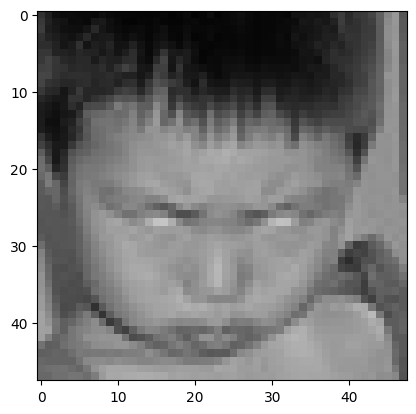

In [3]:
plt.imshow(img)
plt.show()

In [4]:
img_path = "data/train/angry/Training_10118481.jpg"
cv2.imread(img_path).shape

(48, 48, 3)

In [5]:
train_dir = 'data/train' 
test_dir = 'data/test'

In [6]:
img_size = (48, 48) 
batch_size = 32
num_classes = 7 

In [7]:
train_datagen = ImageDataGenerator(width_shift_range = 0.1,
                                   height_shift_range = 0.1,
                                   horizontal_flip = True,
                                   rescale = 1./255,
                                   zoom_range = 0.2,
                                   validation_split = 0.2)
test_datagen = ImageDataGenerator(rescale = 1./255,)

In [8]:
train_generator = train_datagen.flow_from_directory(directory = train_dir,
                                                    target_size = img_size,
                                                    batch_size = batch_size,
                                                    color_mode = "grayscale",
                                                    class_mode = "categorical"
                                                   )
test_generator = test_datagen.flow_from_directory( directory = test_dir,
                                                              target_size = img_size,
                                                              batch_size = batch_size,
                                                              color_mode = "grayscale",
                                                              class_mode = "categorical",
                                                             )

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [9]:
def build_model(input_shape, num_classes):
    model = Sequential([
        layers.Input(shape=input_shape),
        Conv2D(32,(3,3),padding='same',activation='relu'),
        Conv2D(64,(3,3),padding='same',activation='relu'),
        BatchNormalization(),
        MaxPool2D(pool_size=(2, 2)),
        Dropout(0.25),

        Conv2D(128,(3,3),padding='same',activation='relu'),
        Conv2D(256,(3,3),padding='same',activation='relu'),
        BatchNormalization(),
        MaxPool2D(pool_size=(2, 2)),
        Dropout(0.25),

        Conv2D(256,(3,3),padding='same',activation='relu'),
        BatchNormalization(),
        MaxPool2D(pool_size=(2, 2)),
        Dropout(0.25),

        Flatten(),

        Dense(100,activation = 'relu'),

        Dense(50,activation = 'relu'),

        Dense(225,activation = 'relu'),

        BatchNormalization(),
        Dropout(0.25),

        Dense(7, activation='softmax')
    ])
    return model

In [10]:
model = build_model((48, 48, 1), num_classes)

In [11]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 48, 48, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 48, 48, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 48, 48, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 24, 24, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 24, 24, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 24, 24, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 24, 24, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 24, 24, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 12, 12, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 12, 12, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 12, 12, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 12, 12, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 9216)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 100)                 │         921,700 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 50)                  │           5,050 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 225)                 │          11,475 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 225)                 │             900 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 1,920,931 (7.33 MB)

 Trainable params: 1,919,329 (7.32 MB)

 Non-trainable params: 1,602 (6.26 KB)

In [12]:
model.compile(
    optimizer = optimizers.Adam(learning_rate=0.0010), 
    loss='categorical_crossentropy', 
    metrics=['accuracy']
  )

In [13]:
lr_schedule = callbacks.ReduceLROnPlateau(monitor='val_accuracy', factor=0.5, patience=4, verbose=1)
early_stopping = callbacks.EarlyStopping(monitor='val_accuracy', patience=8, restore_best_weights=True, verbose=1)
checkpoint = callbacks.ModelCheckpoint('best_model.keras', monitor='val_accuracy', save_best_only=True, verbose=1)

In [14]:
history = model.fit(
    train_generator,
    epochs=100,  
    validation_data=test_generator,
    callbacks=[lr_schedule, early_stopping, checkpoint]
)

C:\Users\nelso\anaconda3\envs\notebook-6.5.7_1\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/100
898/898 ━━━━━━━━━━━━━━━━━━━━ 0s 536ms/step - accuracy: 0.2120 - loss: 2.0482
Epoch 1: val_accuracy improved from -inf to 0.26219, saving model to best_model.keras
898/898 ━━━━━━━━━━━━━━━━━━━━ 548s 606ms/step - accuracy: 0.2121 - loss: 2.0481 - val_accuracy: 0.2622 - val_loss: 1.9146 - learning_rate: 0.0010
Epoch 2/100
898/898 ━━━━━━━━━━━━━━━━━━━━ 0s 364ms/step - accuracy: 0.2906 - loss: 1.7576
Epoch 2: val_accuracy improved from 0.26219 to 0.39147, saving model to best_model.keras
898/898 ━━━━━━━━━━━━━━━━━━━━ 396s 441ms/step - accuracy: 0.2906 - loss: 1.7575 - val_accuracy: 0.3915 - val_loss: 1.5974 - learning_rate: 0.0010
Epoch 3/100
898/898 ━━━━━━━━━━━━━━━━━━━━ 0s 369ms/step - accuracy: 0.4101 - loss: 1.5200
Epoch 3: val_accuracy improved from 0.39147 to 0.49457, saving model to best_model.keras
898/898 ━━━━━━━━━━━━━━━━━━━━ 353s 393ms/step - accuracy: 0.4102 - loss: 1.5200 - val_accuracy: 0.4946 - val_loss: 1.3169 - learning_rate: 0.0010
Epoch 4/100
898/898 ━━━━━━━━━━━━━━

Epoch 23/100
898/898 ━━━━━━━━━━━━━━━━━━━━ 0s 377ms/step - accuracy: 0.6615 - loss: 0.9181
Epoch 23: val_accuracy improved from 0.63569 to 0.64893, saving model to best_model.keras
898/898 ━━━━━━━━━━━━━━━━━━━━ 360s 401ms/step - accuracy: 0.6615 - loss: 0.9181 - val_accuracy: 0.6489 - val_loss: 0.9447 - learning_rate: 5.0000e-04
Epoch 24/100
898/898 ━━━━━━━━━━━━━━━━━━━━ 0s 364ms/step - accuracy: 0.6591 - loss: 0.9178
Epoch 24: val_accuracy did not improve from 0.64893
898/898 ━━━━━━━━━━━━━━━━━━━━ 349s 389ms/step - accuracy: 0.6591 - loss: 0.9178 - val_accuracy: 0.6439 - val_loss: 0.9568 - learning_rate: 5.0000e-04
Epoch 25/100
898/898 ━━━━━━━━━━━━━━━━━━━━ 0s 362ms/step - accuracy: 0.6678 - loss: 0.8919
Epoch 25: val_accuracy did not improve from 0.64893
898/898 ━━━━━━━━━━━━━━━━━━━━ 346s 386ms/step - accuracy: 0.6678 - loss: 0.8919 - val_accuracy: 0.6457 - val_loss: 0.9702 - learning_rate: 5.0000e-04
Epoch 26/100
898/898 ━━━━━━━━━━━━━━━━━━━━ 0s 366ms/step - accuracy: 0.6669 - loss: 0.8955

Epoch 45/100
898/898 ━━━━━━━━━━━━━━━━━━━━ 0s 365ms/step - accuracy: 0.7169 - loss: 0.7692
Epoch 45: val_accuracy did not improve from 0.67832
898/898 ━━━━━━━━━━━━━━━━━━━━ 350s 389ms/step - accuracy: 0.7169 - loss: 0.7692 - val_accuracy: 0.6755 - val_loss: 0.9216 - learning_rate: 2.5000e-04
Epoch 46/100
898/898 ━━━━━━━━━━━━━━━━━━━━ 0s 366ms/step - accuracy: 0.7223 - loss: 0.7560
Epoch 46: val_accuracy did not improve from 0.67832
898/898 ━━━━━━━━━━━━━━━━━━━━ 350s 390ms/step - accuracy: 0.7223 - loss: 0.7560 - val_accuracy: 0.6733 - val_loss: 0.9198 - learning_rate: 2.5000e-04
Epoch 47/100
898/898 ━━━━━━━━━━━━━━━━━━━━ 0s 369ms/step - accuracy: 0.7288 - loss: 0.7494
Epoch 47: ReduceLROnPlateau reducing learning rate to 0.0001250000059371814.

Epoch 47: val_accuracy did not improve from 0.67832
898/898 ━━━━━━━━━━━━━━━━━━━━ 354s 394ms/step - accuracy: 0.7288 - loss: 0.7494 - val_accuracy: 0.6760 - val_loss: 0.9332 - learning_rate: 2.5000e-04
Epoch 48/100
898/898 ━━━━━━━━━━━━━━━━━━━━ 0s 374m

898/898 ━━━━━━━━━━━━━━━━━━━━ 353s 393ms/step - accuracy: 0.7349 - loss: 0.7055 - val_accuracy: 0.6817 - val_loss: 0.9352 - learning_rate: 6.2500e-05
Epoch 67/100
898/898 ━━━━━━━━━━━━━━━━━━━━ 0s 408ms/step - accuracy: 0.7391 - loss: 0.7136
Epoch 67: val_accuracy improved from 0.68194 to 0.68208, saving model to best_model.keras
898/898 ━━━━━━━━━━━━━━━━━━━━ 392s 436ms/step - accuracy: 0.7391 - loss: 0.7136 - val_accuracy: 0.6821 - val_loss: 0.9349 - learning_rate: 3.1250e-05
Epoch 68/100
898/898 ━━━━━━━━━━━━━━━━━━━━ 0s 528ms/step - accuracy: 0.7489 - loss: 0.6916
Epoch 68: val_accuracy improved from 0.68208 to 0.68264, saving model to best_model.keras
898/898 ━━━━━━━━━━━━━━━━━━━━ 531s 592ms/step - accuracy: 0.7489 - loss: 0.6916 - val_accuracy: 0.6826 - val_loss: 0.9351 - learning_rate: 3.1250e-05
Epoch 69/100
898/898 ━━━━━━━━━━━━━━━━━━━━ 0s 416ms/step - accuracy: 0.7438 - loss: 0.7000
Epoch 69: val_accuracy did not improve from 0.68264
898/898 ━━━━━━━━━━━━━━━━━━━━ 433s 483ms/step - accu

In [15]:
test_labels = []
for i in range(len(test_generator)):
    _, labels = next(test_generator)
    test_labels.extend(np.argmax(labels, axis=1))  

test_labels = np.array(test_labels)

predictions = np.argmax(model.predict(test_generator, verbose=1), axis=1)

225/225 ━━━━━━━━━━━━━━━━━━━━ 25s 108ms/step


In [16]:
train_generator.class_indices

{'angry': 0,
 'disgust': 1,
 'fear': 2,
 'happy': 3,
 'neutral': 4,
 'sad': 5,
 'surprise': 6}

In [17]:
class_names = list(train_generator.class_indices.keys())
class_names

['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

In [18]:
print("Classification report:\n",classification_report(test_labels, predictions,target_names=class_names))
print("Confusion matrix:\n",confusion_matrix(test_labels, predictions))

Classification report:
               precision    recall  f1-score   support

       angry       0.60      0.64      0.62       958
     disgust       0.72      0.61      0.66       111
        fear       0.58      0.45      0.51      1024
       happy       0.86      0.88      0.87      1774
     neutral       0.59      0.72      0.65      1233
         sad       0.59      0.52      0.56      1247
    surprise       0.78      0.81      0.79       831

    accuracy                           0.68      7178
   macro avg       0.68      0.66      0.67      7178
weighted avg       0.68      0.68      0.68      7178

Confusion matrix:
 [[ 617   14   70   31  116   93   17]
 [  22   68    3    2    5    9    2]
 [ 136    5  458   33  129  171   92]
 [  31    2   28 1561   88   29   35]
 [  66    1   50   81  884  128   23]
 [ 132    2  121   60  261  649   22]
 [  31    2   58   39   16   12  673]]


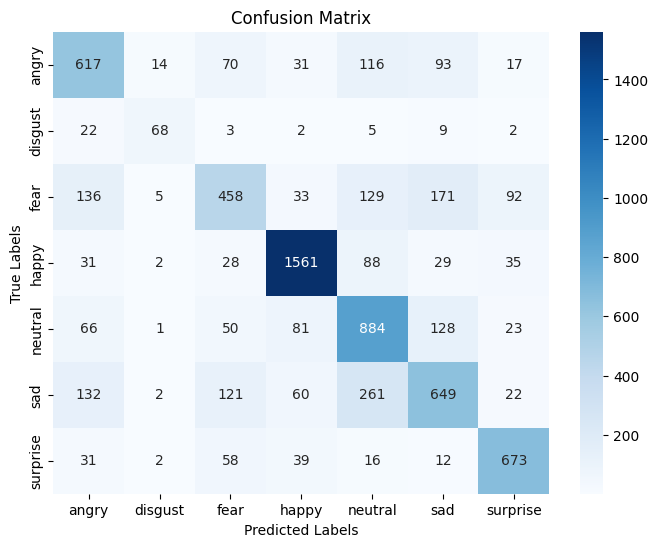

In [19]:
cm = confusion_matrix(test_labels, predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [20]:
score = model.evaluate(test_generator,verbose=0)
print("Test loss:",round(score[0],3))
print("Test accuracy:",round(score[1],2))

Test loss: 0.933
Test accuracy: 0.68


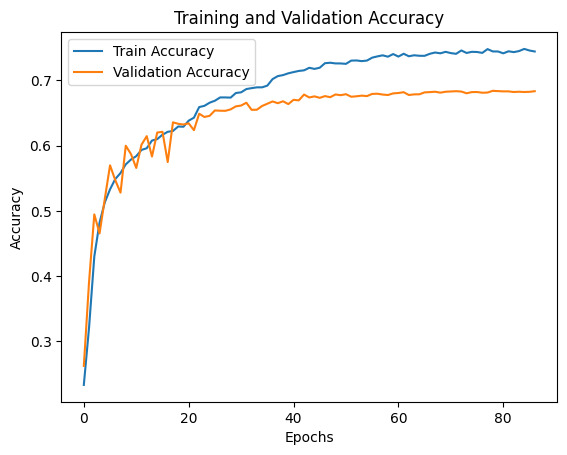

In [21]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

In [22]:
model.save("My_model.h5")